In [49]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

desktop='C:/Users/MINSEOK/Desktop/대학생활/대외활동/kaggle/playground-series-s3e20'
laptop='C:/Users/최민석/OneDrive - UOS/바탕 화면/대학생활/대외활동/Kaggle/kaggle/playground-series-s3e20'

os.chdir(laptop)
train=pd.read_csv('train.csv')
train.head()


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

로드맵
====================

+ 결측치 해결
+ 데이터셋을 의도적으로 분리해야 하는지 정하기(이상치)
+ 계절성, 상관성 반영하는 시계열 모델? 일반 회귀 모델?
+ 그 중에서 어떤 모델 써야 하는가?
+ HyperParameter 조정



EDA 전략
--------------------

- null 값이 집중된 지역 찾기(있다면)
- 전반적인 지역에서 배출량에 계절성이 있는지 확인 
- UVAerosolLayerHeight의 관측량이 현저히 적은데 주로 어디서 언제 관측되었는가
- 특정 기간에 전반적으로 배출량이 늘어난 적이 있는지(계절성 X)

## 문제 전략 수립
### 기준 설정하기
- 배출량이 현저히 많이 발생한 기준을 어떻게 잡을지
- null값을 어떻게 채워 넣을 것인지 - interpolation(아마도 이것), median

### 예상되는 문제 및 고민점
- 각 센서가 해당 성분 관측량에 어느정도 영향을 미치는지
> 센서의 상태(zenith, azimuth), 관측기상의 상태(cloud)가 같은 성분 관측량에 미치는 영향이 있다면  
어떻게 반영할 것인지? 그냥 딥러닝 넣고 돌리기?
- 필요없는 열이 있나? 시계열 데이터인데 상관계수행렬로 분석해도 될까?
- 만약 필요없는 열이 있다면, 그냥 버리는게 나을지? 아니면 다른 열과 조합해 의미있는 변수 생성이 나을지?

<AxesSubplot: xlabel='year', ylabel='emission'>

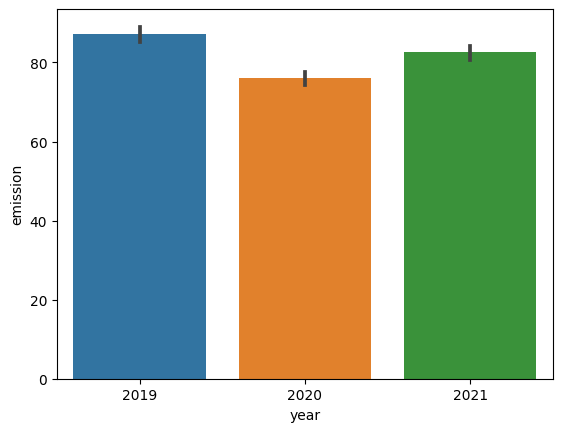

In [51]:
sns.barplot(x=train['year'], y=train['emission'])

C:\Users\최민석\AppData\Local\Temp\ipykernel_21980\181141629.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tr_g=train.groupby(['latitude', 'longitude','year']).sum().reset_index()


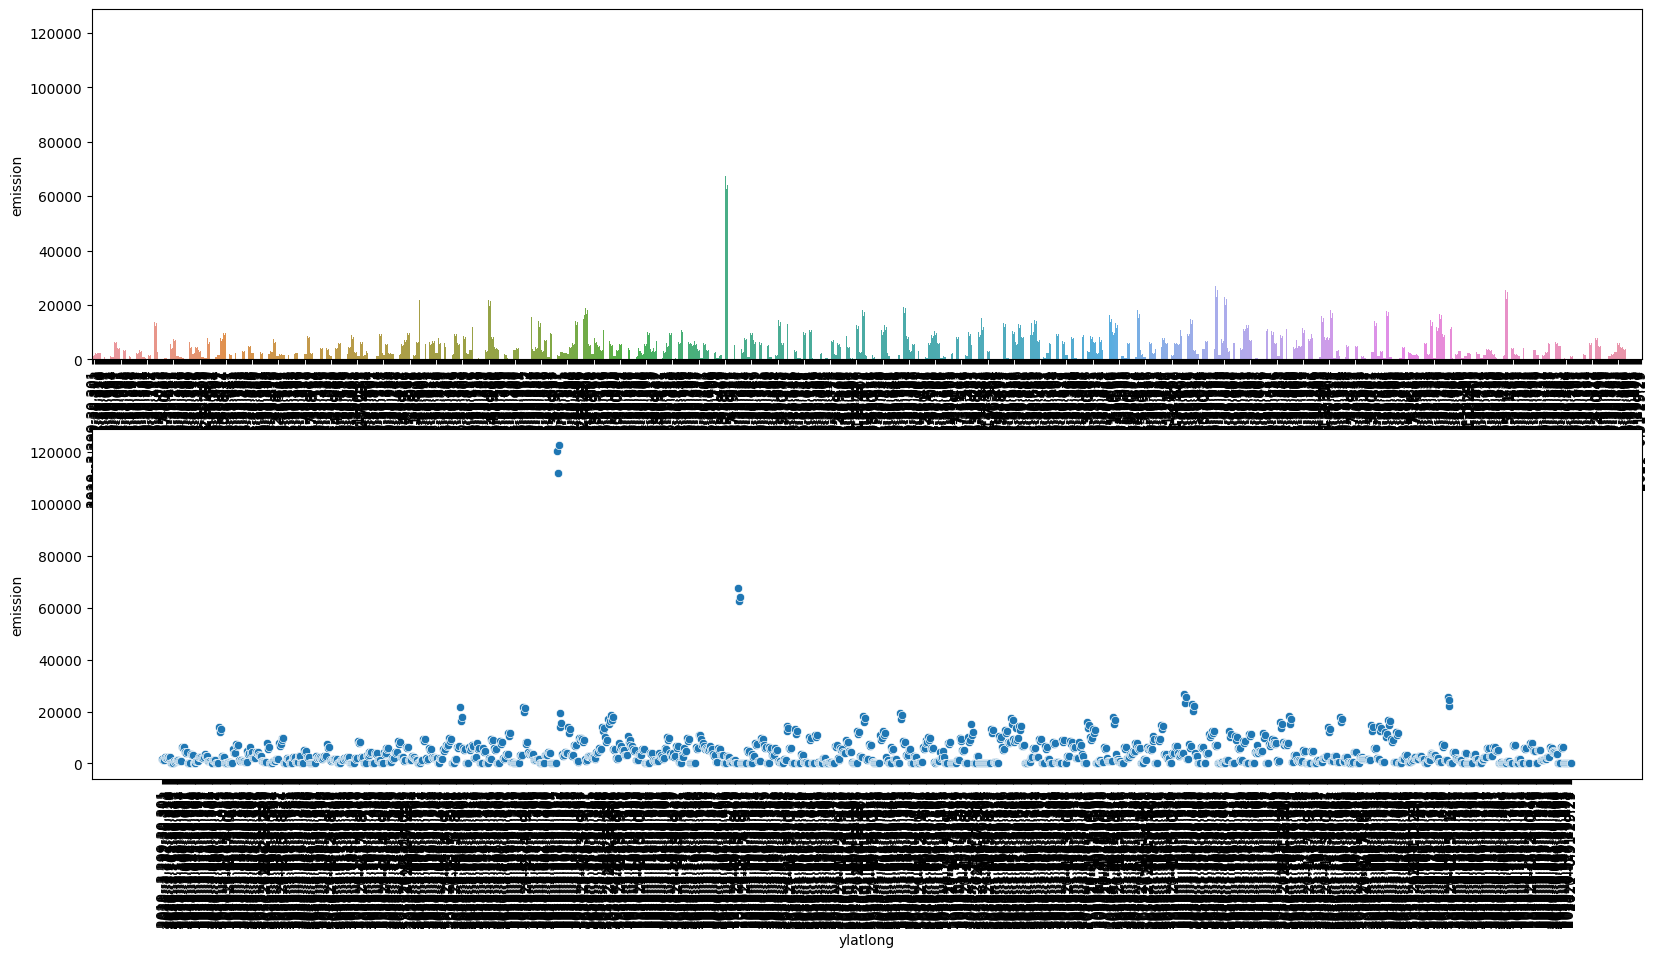

In [55]:
tr_g=train.groupby(['latitude', 'longitude','year']).sum().reset_index()
tr_g['ylatlong']=tr_g['year'].astype("str")+"-"+tr_g['latitude'].astype('str')+"-"+tr_g['longitude'].astype('str')
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
sns.barplot(data=tr_g, x='ylatlong', y='emission', ax=axs[0])
sns.scatterplot(data=tr_g, x='ylatlong', y='emission', ax=axs[1])
plt.rcParams.update({'font.size': 5})
for ax in fig.get_axes():
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [64]:
print("emission over 20000, under 40000 :", "\n", 
    "====================", "\n",
    tr_g.loc[(tr_g['emission']>20000)&(tr_g['emission']<40000),['ylatlong','emission']], "\n")
print("emission over 40000 :", "\n", 
    "====================", "\n",
    tr_g.loc[(tr_g['emission']>=40000),['ylatlong','emission']])


emission over 20000, under 40000 : 
                 ylatlong     emission
315   2019--2.599-29.801  21909.88867
381   2019--2.441-28.959  21774.32699
383   2021--2.441-28.959  21448.42906
1080  2019--1.346-31.254  26811.04628
1081  2020--1.346-31.254  23104.89092
1082  2021--1.346-31.254  25655.03577
1089  2019--1.342-31.358  22928.66018
1090  2020--1.342-31.358  20041.01728
1091  2021--1.342-31.358  22157.81489
1359  2019--0.956-30.744  25536.07867
1360  2020--0.956-30.744  22276.53209
1361  2021--0.956-30.744  24595.67747 

emission over 40000 : 
                ylatlong      emission
417  2019--2.378-29.222  120502.10860
418  2020--2.378-29.222  111999.30710
419  2021--2.378-29.222  122614.21320
609  2019--2.079-29.321   67483.12788
610  2020--2.079-29.321   62728.78994
611  2021--2.079-29.321   64068.03855


EDA by ambrosm 'PSS3E20 EDA which makes sense ⭐️⭐️⭐️⭐️⭐️'  
---------------------------------------------------------------
https://www.kaggle.com/code/ambrosm/pss3e20-eda-which-makes-sense/notebook

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt

desktop='C:/Users/MINSEOK/Desktop/대학생활/대외활동/kaggle/playground-series-s3e20'
laptop='C:/Users/최민석/OneDrive - UOS/바탕 화면/대학생활/대외활동/Kaggle/kaggle/playground-series-s3e20'

os.chdir(laptop)
train=pd.read_csv('train.csv')
train.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


## 좌표 지도에 시각화


In [ ]:

import folium
import geopandas as gpd

train_coords=train.drop_duplicates(subset=['latitude', 'longitude'])
# geopandas : pandas dataframe과 유사, df.plot하면 지도 자동생성가능(geometry 있을시)
# gpd의 geometry 열 데이터에 들어갈 x,y 좌표 생성
geometry=gpd.points_from_xy(train_coords.longitude, train_coords.latitude)
geo_df=gpd.GeoDataFrame(train_coords[['latitude','longitude']], geometry=geometry)

# 점들 표시해줄 folium 객체 생성
all_data_map=folium.Map(prefer_canvas=True)
geo_df_list=[[point.y, point.x] for point in geo_df.geometry]

for coordinates in geo_df_list:
    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius=1,
            weight=4,
            zoom=10,
            color='red'),
    )

# 지도 크기 맞게 확대 
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

why?
==========
Insight: The target must not be transformed:  
The competition is scored on root mean squared error (RMSE),   and the usual target transformations make it very hard to optimize RMSE.

## target 값의 분포 확인 : 지역별로 배출량의 평균 분포 


In [ ]:

train.groupby(['latitude', 'longitude']).emission.mean().sort_values()

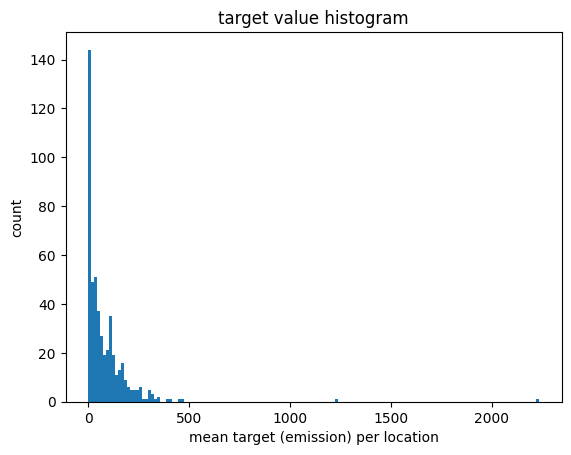

In [13]:
plt.hist(train.groupby(['latitude', 'longitude']).emission.mean(), bins=150)
plt.title('target value histogram')
plt.xlabel('mean target (emission) per location')
plt.ylabel('count')
plt.show()

### 특정 열 값에 대해 달라지는 점 색상 지도에 표시


In [ ]:

import matplotlib

def rgba_to_hex(color):
    """Return color as #rrggbb for the given color values."""
    red, green, blue, alpha = color
    return f"#{int(red*255):02x}{int(green*255):02x}{int(blue*255):02x}"

temp = train.groupby(['latitude', 'longitude']).emission.mean().reset_index()
geometry = gpd.points_from_xy(temp.longitude, temp.latitude)


cmap = matplotlib.colormaps['coolwarm']
normalizer = matplotlib.colors.Normalize(vmin=np.log1p(temp.emission.min()), vmax=np.log1p(temp.emission.max()))

all_data_map = folium.Map(prefer_canvas=True)

geo_df_list = [[point.xy[1][0], point.xy[0][0]] for point in geometry]

for coordinates, emission in zip(geo_df_list, temp.emission):

    all_data_map.add_child(
        folium.CircleMarker(
            location=coordinates,
            radius = 1,
            weight = 4,
            zoom =10,
            # color 옵션 : #rrggbb 입력하면 색 표시해줌 
            # 여기서는 normalizer로 변환한 값별 색상 정도를 #rrggbb로 반환한 값 대입
            color = rgba_to_hex(cmap(normalizer(np.log1p(emission))))),
        )
all_data_map.fit_bounds(all_data_map.get_bounds())
all_data_map

### 각 위치(속성)별 시계열 그래프 그리기
  (기본 plt.plot 사용)

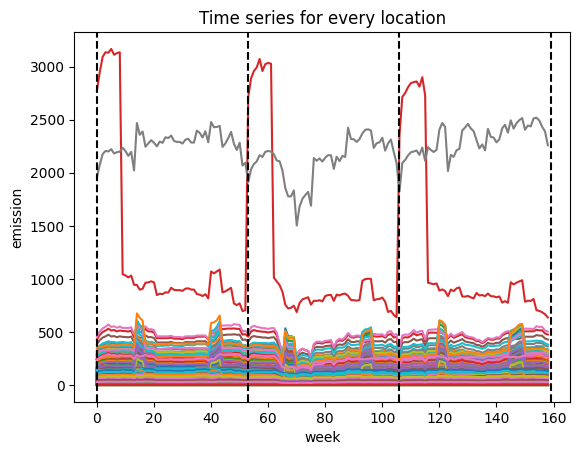

In [21]:
for ll in train[['latitude', 'longitude']].drop_duplicates().iterrows():
    # iterrows 객체의 [1]번 속성: i번째 행의 각 열 이름-값
    time_series = train[(train.latitude == ll[1].latitude) & (train.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 159]:
    # axv(/h)line: 수직, 수평선 그리기
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.show()

### 시계열 분석 : 추세 추정법(extrapolating the trend)

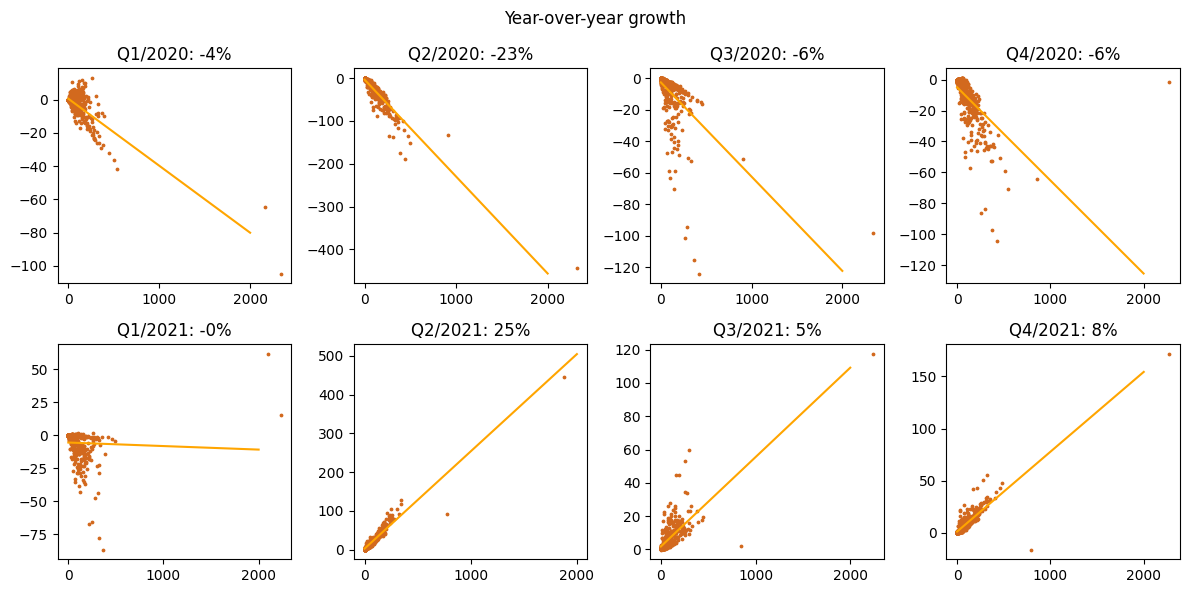

MultiIndex([(2019, 1),
            (2019, 2),
            (2019, 3),
            (2019, 4),
            (2020, 1),
            (2020, 2),
            (2020, 3),
            (2020, 4),
            (2021, 1),
            (2021, 2),
            (2021, 3),
            (2021, 4)],
           names=['year', 'quarter'])


In [29]:
from sklearn.linear_model import LinearRegression

temp = train.copy()
# 주차에 따른 분기 계산법 (14로 나눈몫 +1)
temp['quarter'] = temp['week_no'] // 14 + 1
grouped = temp.groupby(['longitude', 'latitude', 'year', 'quarter'])[['emission']].mean()
# unstack: 계산은 묶어서, 나중에 볼때는 위경도를 멀티인덱스에서 빼고 열로 넣기 (피벗 테이블에서)
grouped = grouped.unstack(['longitude', 'latitude'])
delta = 4
# grouped 된 객체에도 shift 적용가능(여기서는 4분기==1년 차이를 계산)
one_year_difference = grouped.shift(-delta) - grouped

n_diagrams = 8
_, axs = plt.subplots(2, 4, figsize=(12, 6))

for i in range(n_diagrams):
    #subplot canvas들이 n*m 행렬 모양으로 저장됨 -> ravel로 펴기
    ax = axs.ravel()[i]
    ax.scatter(grouped.iloc[i], one_year_difference.iloc[i], c='chocolate', s=3)
    lr = LinearRegression()
    lr.fit(grouped.iloc[i].values.reshape(-1, 1), one_year_difference.iloc[i])
    xs = np.array([[0], [2000]])
    y_pred = lr.predict(xs)
    ax.plot(xs, y_pred, color='orange')
    index = grouped.index[i+delta]
    ax.set_title(f"Q{index[1]}/{index[0]}: {lr.coef_[0]:1.0%}")
    ax.set_xticks([0, 1000, 2000])
plt.suptitle('Year-over-year growth')
plt.tight_layout()
# plt.savefig('growth.png', bbox_inches='tight')
plt.show()

print(grouped.index)

### RMSE 에서 큰 오차 지분을 담당하는 자료 찾기(이상치 조정, 색출)

In [ ]:
# 시계열 데이터는 연별로 값이 비슷하다고 가정할시
# 각 연도의 주차별로 지역당 배출량 값 있는 피벗 테이블 만듬
# 두 피벗 테이블을 연산해 MSE 구하기 - 피벗 테이블을 쓰는 이유 

df2019 = train[train['year']==2019].pivot_table(index='week_no',columns=['longitude','latitude'],values='emission')
df2021 = train[train['year']==2021].pivot_table(index='week_no',columns=['longitude','latitude'],values='emission')

# Calculate the Mean Squared Error (MSE) between df1 and df3
mse_df2019_df2021 = ((df2019 - df2021) ** 2).mean()
mse_df2019_df2021.rename('MSE',inplace=True)
mse_df2019_df2021 = mse_df2019_df2021.to_frame()
mse_df2019_df2021['Percentage'] = mse_df2019_df2021['MSE']/mse_df2019_df2021['MSE'].sum()*100
mse_df2019_df2021

In [ ]:
# Sorting the values
mse_rank = mse_df2019_df2021.sort_values('MSE',ascending=False)

# Creating a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(11, 4))  # 1 row, 2 columns

# Plotting MSE
mse_rank['MSE'].head(20).sort_values().plot(kind='barh', ax=axs[0])
axs[0].set_title('Error from each location')
axs[0].set_xlabel('MSE')

# Plotting Percentage
perc_plot = mse_rank['Percentage'].head(20).sort_values().plot(kind='barh', ax=axs[1])
axs[1].set_title('Percentage of error from each location')
axs[1].set_xlabel('Percentage [%]')
for p in perc_plot.patches:
    perc_plot.annotate("%.2f%%" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 0), textcoords='offset points')

# Displaying the plots
plt.tight_layout()  # axs 사이의 간격 조정
plt.show()

### 성능 향상 idea : by Xuebin Jiang  
  3rd Place Solution (convert the COVID affected 2020 week8-week32's emission)
    
  https://www.kaggle.com/competitions/playground-series-s3e20/discussion/433822

1. COVID에 영향받은 달의 데이터를 그렇지 않은 년도의 데이터와 비교해  
COVID 영향을 제거한 값으로 변경해줌

- Calculate the average emission by week in the Non-COVID dataset.
- Calculate the average emission by week in the COVID dataset.
- Calculate the ratio.
- Convert the COVID dataset’s emission by multiplying the ratio.
- Replace the training dataset’s emission value by the new value of the COVID period.



2. 문제에서 추정하고자 하는 기간동안의 주차만큼만 각 연도에서 뽑아 학습시킴

3. 2022년은 2021년의 CO2 증가 추세를 따라갈 확률이 높으므로  
1.07을 예상치에 곱함

4. 사용모델 : baggingregressor에서 randomforest 를 base model로

SVD
=====

중요한 변수 요소만 추려내기 좋음

In [32]:
emission = train.pivot(index=['latitude', 'longitude'], 
                       columns=['year', 'week_no'], values='emission')
with pd.option_context("display.max_columns", 6, "display.max_rows", 6):
    display(emission)

year                     2019                        ...       2021  \
week_no                    0          1          2   ...         50   
latitude longitude                                   ...              
-3.299   30.301     26.111166  28.045977  29.293518  ...  29.131205   
-3.287   29.713     39.696404  43.529408  45.993286  ...  46.808056   
-3.174   29.926     41.193130  43.877285  45.760826  ...  45.675720   
...                       ...        ...        ...  ...        ...   
-0.547   29.653      0.500023   0.529315   0.554183  ...   0.618269   
-0.528   29.472      3.857115   4.213432   4.451489  ...   4.683615   
-0.510   29.290      3.750994   4.025176   4.231381  ...   4.607418   

year                                      
week_no                    51         52  
latitude longitude                        
-3.299   30.301     28.125792  27.239302  
-3.287   29.713     44.268930  43.260082  
-3.174   29.926     44.668972  42.904007  
...                       ...        ...  
-0.547   29.653      0.609128   0.575292  
-0.528   29.472      4.450044   4.318747  
-0.510   29.290      4.470275   4.269510  

[497 rows x 159 columns]

[0.92628396 0.98343285 0.99762541 0.99915016 0.99989078 0.99998858
 0.9999949 ]


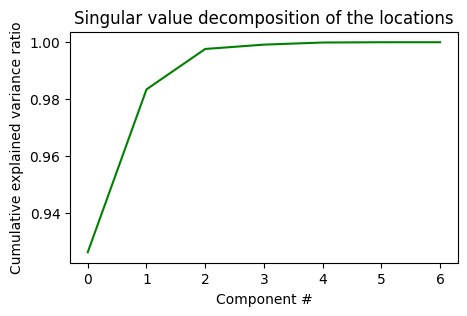

In [38]:
from sklearn.decomposition import TruncatedSVD, NMF
from matplotlib.ticker import MaxNLocator

svd = TruncatedSVD(n_components=7)
svd.fit(emission)

plt.figure(figsize=(5, 3))
print(svd.explained_variance_ratio_.cumsum())
plt.plot(svd.explained_variance_ratio_.cumsum(), color='g')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title('Singular value decomposition of the locations')
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Component #')
plt.show()

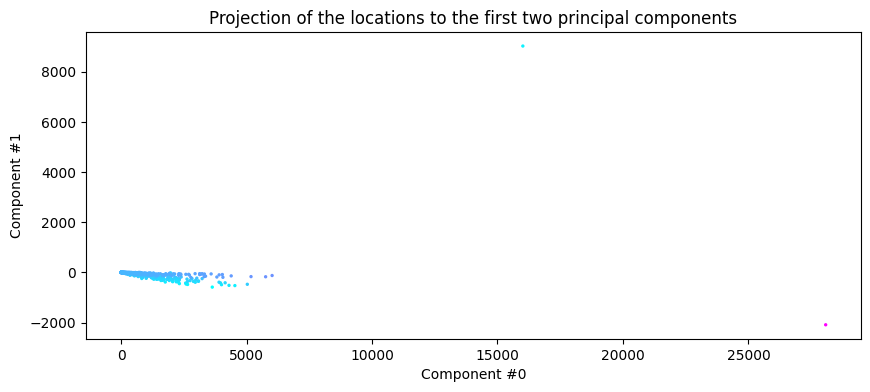

In [39]:
# Special locations (latitude, longitude)
named_loc = {'Nyamasheke': (-2.378, 29.222),
             'Lake Kivu': (-2.079, 29.321),
             'Kihanga': (-1.346, 31.254),
             'Musanze': (-1.514, 29.686),
            }

embedding = pd.DataFrame(svd.fit_transform(emission), index=emission.index) # 5 columns
denoised_emission = pd.DataFrame(svd.inverse_transform(embedding),
                                columns=emission.columns,
                                index=emission.index)
cx, cy, cc = 0, 1, 2
plt.figure(figsize=(10, 10))
plt.gca().set_aspect('equal')

plt.scatter(embedding.values.T[cx], embedding.values.T[cy], s=2,
            c=embedding.values.T[cc], cmap='cool')
plt.title('Projection of the locations to the first two principal components')
plt.xlabel(f'Component #{cx}')
plt.ylabel(f'Component #{cy}')
plt.show()


In [40]:
denoised_emission.head()

year                     2019                                              \
week_no                    0          1          2          3          4    
latitude longitude                                                          
-3.299   30.301     26.087806  27.975720  29.181849  29.842462  30.466988   
-3.287   29.713     39.638786  43.440485  45.880049  47.056685  48.652541   
-3.174   29.926     41.169729  43.724156  45.485379  46.397287  47.009636   
-3.161   28.839      0.108391   0.113853   0.118430   0.119698   0.118235   
-3.153   30.347     15.054411  16.203816  16.800065  17.223255  17.642634   

year                                                                       \
week_no                    5          6          7          8          9    
latitude longitude                                                          
-3.299   30.301     30.229648  30.248341  29.690811  29.914028  30.528528   
-3.287   29.713     47.282383  47.639126  46.463858  47.229725  46.825086   
-3.174   29.926     47.326542  47.039165  46.362429  46.431971  48.298669   
-3.161   28.839      0.121095   0.118160   0.119587   0.118834   0.126210   
-3.153   30.347     17.190865  17.362756  17.050100  17.293695  17.063577   

year                ...       2021                                   \
week_no             ...         43         44         45         46   
latitude longitude  ...                                               
-3.299   30.301     ...  30.263096  29.562623  29.968177  29.985893   
-3.287   29.713     ...  46.044382  46.348792  46.453196  46.483989   
-3.174   29.926     ...  49.057715  47.360615  48.407334  48.400059   
-3.161   28.839     ...   0.134718   0.135044   0.138406   0.137693   
-3.153   30.347     ...  15.597169  15.692175  15.686488  15.712114   

year                                                                       \
week_no                    47         48         49         50         51   
latitude longitude                                                          
-3.299   30.301     30.682080  29.432386  29.236222  29.209755  28.278933   
-3.287   29.713     46.727614  47.266752  46.816287  46.800306  44.302768   
-3.174   29.926     50.211611  46.442851  46.200508  45.944549  45.158039   
-3.161   28.839      0.143675   0.138950   0.137686   0.133822   0.133272   
-3.153   30.347     15.658529  16.147791  16.003476  16.130589  15.311811   

year                           
week_no                    52  
latitude longitude             
-3.299   30.301     27.385369  
-3.287   29.713     43.302303  
-3.174   29.926     43.349538  
-3.161   28.839      0.125239  
-3.153   30.347     15.021808  

[5 rows x 159 columns]

In [50]:
embedding

,,0,1,2,3,4,5,6
latitude,longitude,,,,,,,
-3.299,30.301,348.544254,-16.055927,26.664935,-9.491554,0.199119,-7.913590,0.031646
-3.287,29.713,531.775077,-16.456463,39.938081,-19.864472,-14.507285,-3.395468,0.201548
-3.174,29.926,564.077106,-33.032219,46.034458,-1.260088,4.539892,-18.673499,0.001657
-3.161,28.839,1.576729,-0.134534,0.168517,0.058200,0.048059,-0.016962,-0.007051
-3.153,30.347,183.889787,-3.715838,13.201196,-17.563216,2.846226,-0.106879,-0.313389
...,...,...,...,...,...,...,...,...
-0.598,29.102,1.132422,-0.096973,0.120183,0.042024,0.034286,-0.013248,-0.004912
-0.569,30.031,1460.708205,-117.876445,94.498386,24.060068,-3.402808,-66.716648,3.574720
-0.547,29.653,7.393733,-0.630877,0.790199,0.272923,0.225351,-0.079572,-0.033059


In [57]:
embedding.sort_values(by=1)

,,0,1,2,3,4,5,6
latitude,longitude,,,,,,,
-2.378,29.222,28080.853700,-2088.272733,2193.569336,739.443266,325.634540,108.868550,-1.303497
-1.514,29.686,3632.412508,-586.488322,-870.519124,-0.157634,50.415170,24.515523,46.176175
-2.599,29.801,4533.545660,-526.023464,-669.641472,-321.972665,260.486522,27.176907,35.198624
-2.293,29.507,4299.758721,-516.455019,-589.553151,-6.859450,-66.412418,5.087937,-7.459100
-1.486,29.614,4000.633755,-490.797040,-603.510532,-91.629153,30.911886,31.886769,44.472401
...,...,...,...,...,...,...,...,...
-1.833,28.467,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-2.898,29.002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
-1.505,30.995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
embedding.sort_values(by=2)

,,0,1,2,3,4,5,6
latitude,longitude,,,,,,,
-1.514,29.686,3632.412508,-586.488322,-870.519124,-0.157634,50.415170,24.515523,46.176175
-1.319,30.281,2648.923023,-480.212934,-734.163737,96.470533,-21.915385,-5.139040,-3.782921
-2.079,29.321,16011.050228,9021.791074,-706.242094,111.918689,39.891130,-3.260921,0.145485
-2.154,29.946,2590.677500,-464.448035,-699.517555,112.697400,-45.997301,-4.082439,-2.899032
-2.335,29.665,2320.846021,-448.150427,-695.628114,128.790241,-43.909885,-5.053412,-2.074566
...,...,...,...,...,...,...,...,...
-1.847,30.953,4386.757830,-139.266602,336.593506,-176.716015,-122.281959,5.236492,-1.195710
-1.342,31.358,5176.993244,-168.409112,402.061612,-200.949686,-138.161203,6.173686,-2.364344
-0.956,30.744,5758.717610,-174.006787,422.875544,-243.966439,-175.788235,-7.967603,1.445470


In [42]:
embedding.values.T

array([[ 3.48544254e+02,  5.31775077e+02,  5.64077106e+02, ...,
         7.39373279e+00,  5.27907729e+01,  5.36997761e+01],
       [-1.60559272e+01, -1.64564625e+01, -3.30322192e+01, ...,
        -6.30876641e-01, -2.17395729e+00, -3.61211261e+00],
       [ 2.66649355e+01,  3.99380809e+01,  4.60344583e+01, ...,
         7.90199336e-01,  4.50398119e+00,  5.29877868e+00],
       ...,
       [ 1.99118994e-01, -1.45072849e+01,  4.53989197e+00, ...,
         2.25351271e-01, -7.63379721e-01,  6.68565433e-01],
       [-7.91359013e+00, -3.39546776e+00, -1.86734995e+01, ...,
        -7.95719113e-02,  7.44450478e-02, -2.78828949e-01],
       [ 3.16464429e-02,  2.01548111e-01,  1.65749427e-03, ...,
        -3.30585883e-02, -8.11539653e-02, -1.81405794e-01]])